In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv('dados.csv', sep = ';', encoding = "ISO-8859-1")

In [4]:
df.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
0,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,2,2011/1,CIC0007,27990
1,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2011/1,ENM0068,27990
2,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2011/1,ENM0071,27990
3,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2011/1,FGA0008,27990
4,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,2,2011/1,FGA0009,27990


In [6]:
df_fluxos = pd.read_csv('fluxos.csv', sep = ';', encoding = "ISO-8859-1")

In [7]:
df_fluxos.head()

,Abrev,IDFluxo,Periodo,Natureza,IDDisciplina
0,AEROESPACIAL,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,Obrigatória,FGA0161
1,AEROESPACIAL,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,Obrigatória,FGA0162
2,AEROESPACIAL,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,Obrigatória,FGA0168
3,AEROESPACIAL,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,Obrigatória,MAT0024
4,AEROESPACIAL,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,Obrigatória,MAT0030


In [8]:
df.dtypes

IDFluxo         object
Status           int64
Matriculas       int64
Ingresso        object
IDDisciplina    object
IDEstudante      int64
dtype: object

In [9]:
df_fluxos.dtypes

Abrev           object
IDFluxo         object
Periodo          int64
Natureza        object
IDDisciplina    object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92932 entries, 0 to 92931
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IDFluxo       92932 non-null  object
 1   Status        92932 non-null  int64 
 2   Matriculas    92932 non-null  int64 
 3   Ingresso      92867 non-null  object
 4   IDDisciplina  92932 non-null  object
 5   IDEstudante   92932 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 4.3+ MB


In [11]:
df_fluxos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3403 entries, 0 to 3402
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Abrev         3403 non-null   object
 1   IDFluxo       3403 non-null   object
 2   Periodo       3403 non-null   int64 
 3   Natureza      3403 non-null   object
 4   IDDisciplina  3403 non-null   object
dtypes: int64(1), object(4)
memory usage: 133.1+ KB


In [12]:
df['IDFluxo'].unique()

array(['ENGENHARIA AEROESPACIAL/FGA - Bacharel - Presencial - D - 20121',
       'ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20172',
       'ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - D - 20162',
       'ENGENHARIA DE SOFTWARE/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA DE SOFTWARE/FGA - Bacharel - Presencial - D - 20171',
       'ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20152',
       'ENGENHARIA/FGA - Bacharel - Presencial - D - 20082'], dtype=object)

In [13]:
df['Ingresso'].unique()

array(['2011/1', '2012/1', '2012/2', '2013/1', '2013/2', '2014/1',
       '2014/2', '2015/1', '2015/2', '2016/1', '2016/2', '2017/1',
       '2017/2', '2018/1', '2018/2', '2019/1', '2019/2', '2020/1',
       '2020/2', '2021/1', '2010/2', '2011/2', '2009/2', nan, '2021/2'],
      dtype=object)

In [14]:
df['IDDisciplina'].unique()

array(['CIC0007', 'ENM0068', 'ENM0071', 'FGA0008', 'FGA0009', 'FGA0011',
       'FGA0021', 'FGA0037', 'FGA0038', 'FGA0039', 'FGA0043', 'FGA0044',
       'FGA0045', 'FGA0048', 'FGA0050', 'FGA0063', 'FGA0066', 'FGA0075',
       'FGA0078', 'FGA0117', 'FGA0133', 'FGA0134', 'FGA0139', 'FGA0143',
       'FGA0144', 'FGA0148', 'FGA0150', 'FGA0153', 'FGA0157', 'FGA0160',
       'FGA0161', 'FGA0162', 'FGA0164', 'FGA0167', 'FGA0168', 'FGA0169',
       'FGA0178', 'FGA0179', 'FGA0181', 'FGA0184', 'FGA0186', 'FGA0187',
       'FGA0188', 'FGA0196', 'FGA0197', 'FGA0204', 'FGA0235', 'FGA0250',
       'FGA0254', 'IFD0171', 'IFD0173', 'IQD0125', 'IQD0126', 'MAT0024',
       'MAT0026', 'MAT0027', 'MAT0030', 'ENM0080', 'FGA0027', 'FGA0034',
       'FGA0055', 'FGA0056', 'FGA0086', 'FGA0087', 'FGA0093', 'FGA0102',
       'FGA0119', 'FGA0120', 'FGA0151', 'FGA0155', 'FGA0163', 'FGA0190',
       'FGA0191', 'FGA0195', 'FGA0228', 'FGA0229', 'FGA0230', 'FGA0231',
       'FGA0232', 'FGA0268', 'FGA0282', 'FGA0052', 

In [15]:
df_fluxos['Abrev'].unique()

array(['AEROESPACIAL', 'AUTOMOTIVA', 'ELETRÔNICA', 'ENERGIA',
       'ENGENHARIA FGA', 'SOFTWARE'], dtype=object)

In [16]:
df_fluxos['IDFluxo'].unique()

array(['ENGENHARIA AEROESPACIAL/FGA - Bacharel - Presencial - D - 20121',
       'ENGENHARIA AEROESPACIAL/FGA - Bacharel - Presencial - D - 20182',
       'ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20132',
       'ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20142',
       'ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20152',
       'ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20172',
       'ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20132',
       'ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20152',
       'ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20201',
       'ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - D - 20132',
       'ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - 

In [17]:
df_fluxos['Natureza'].unique()

array(['Obrigatória', 'Optativa'], dtype=object)

In [18]:
df_fluxos['IDDisciplina'].unique()

array(['FGA0161', 'FGA0162', 'FGA0168', 'MAT0024', 'MAT0030', 'FGA0157',
       'FGA0254', 'IFD0171', 'IFD0173', 'MAT0026', 'CIC0088', 'FGA0008',
       'FGA0133', 'FGA0153', 'FGA0160', 'IQD0125', 'IQD0126', 'MAT0027',
       'ENM0080', 'FGA0150', 'FGA0178', 'FGA0102', 'ENM0068', 'FGA0204',
       'FGA0086', 'FGA0087', 'FGA0139', 'ENM0071', 'FGA0038', 'FGA0164',
       'FGA0184', 'FGA0197', 'FGA0039', 'FGA0043', 'FGA0045', 'FGA0148',
       'FGA0048', 'FGA0050', 'FGA0250', 'FGA0009', 'FGA0021', 'FGA0011',
       'ADM0023', 'ADM0092', 'CIC0004', 'CIC0007', 'CIC0090', 'CIC0093',
       'CIC0094', 'CIC0105', 'CIC0140', 'CIC0174', 'CIC0175', 'CIC0197',
       'DEG0200', 'DEG0201', 'DEG0202', 'DEG0203', 'DEG0205', 'DEG0206',
       'DEG0207', 'DEG0208', 'DEG0209', 'DEG0210', 'DEG0211', 'DEG0212',
       'DEG0213', 'DEG0214', 'DEG0215', 'DEG0216', 'DEG0217', 'DEG0218',
       'DEG0219', 'ENC0035', 'ENE0130', 'ENE0172', 'ENE0177', 'ENE0277',
       'ENE0278', 'ENE0334', 'ENM0082', 'ENM0120', 

In [25]:
X = df.drop(['Status', 'IDFluxo', 'IDDisciplina'], axis=1).copy()
X.head()

,Matriculas,Ingresso,IDEstudante
0,2,2011/1,27990
1,1,2011/1,27990
2,1,2011/1,27990
3,1,2011/1,27990
4,2,2011/1,27990


In [26]:
y = df['Status'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

In [28]:
X.dtypes

Matriculas      int64
Ingresso       object
IDEstudante     int64
dtype: object

In [40]:
X_encoded = pd.get_dummies(X, columns=['Ingresso'])
X_encoded.head()

,Matriculas,IDEstudante,Ingresso_2009/2,Ingresso_2010/2,Ingresso_2011/1,Ingresso_2011/2,Ingresso_2012/1,Ingresso_2012/2,Ingresso_2013/1,Ingresso_2013/2,...,Ingresso_2017/1,Ingresso_2017/2,Ingresso_2018/1,Ingresso_2018/2,Ingresso_2019/1,Ingresso_2019/2,Ingresso_2020/1,Ingresso_2020/2,Ingresso_2021/1,Ingresso_2021/2
0,2,27990,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,27990,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,27990,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,27990,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,27990,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y.unique()

array([1, 2, 5], dtype=int64)

In [41]:
len(X_encoded)

92932

In [39]:
len(y)

92932

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

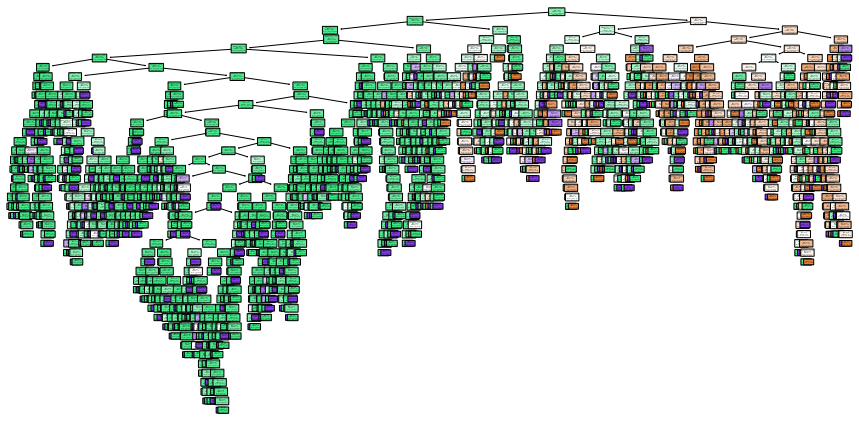

In [43]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True,
        class_names=["Formado", "Matrículado", "Evadido"],
        feature_names=X_encoded.columns);

C:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


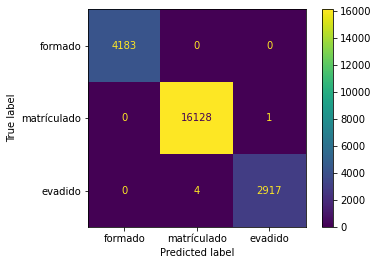

In [44]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels =["formado", "matrículado", "evadido"])

In [45]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

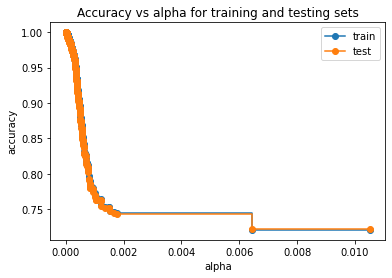

In [46]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label ="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()